In [1]:
import matplotlib.pyplot as plt
%run ../functions/ARFF.ipynb
arff_file_path = str('../data/Amazon_initial_50_30_10000.arff')
data, attributes, classes = load_arff_data(arff_file_path)
df = pd.DataFrame(data, columns=attributes)
df

,the numeric,and numeric,a numeric,of numeric,to numeric,is numeric,I numeric,in numeric,that numeric,it numeric,...,ra_ numeric,le_to numeric,bra numeric,uch_a numeric,ave_a numeric,n_in_ numeric,ied_ numeric,nd_b numeric,rso numeric,class
0,5,3,4,4,1,5,1,3,2,4,...,0,0,0,1,0,1,0,0,0,Agresti
1,12,3,6,2,3,4,2,0,1,3,...,0,0,5,0,1,0,0,0,0,Agresti
2,3,2,2,4,4,2,2,2,3,1,...,0,0,6,0,0,0,0,1,0,Agresti
3,18,4,6,5,4,2,1,0,4,3,...,0,0,0,0,0,0,0,0,0,Agresti
4,13,4,7,5,4,5,0,1,0,4,...,0,0,1,0,0,1,1,0,0,Agresti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,15,11,5,9,10,0,5,6,1,3,...,0,0,0,0,0,1,0,2,0,Wilson
1496,12,7,7,5,5,3,3,2,1,5,...,0,0,0,0,0,0,0,0,0,Wilson
1497,8,10,2,4,2,0,2,3,1,1,...,0,0,0,0,0,0,0,0,0,Wilson
1498,11,12,10,7,8,4,4,7,2,2,...,0,0,0,0,0,0,0,1,2,Wilson


# Nedostajuće vrednosti

In [2]:
df.isna().any().any()

False

Primećujemo da u datom skupu podataka ne postoji nijedno polje koje nije popunjeno podacima. Iako ni u originalnom skupu ne bi bilo nedostajućih vrednosti, funkcija koju smo napravili za učitavanje podataka bi u slučaju dupliranih klasa uklonila duplikat, a u slučaju nedostatka podataka upisala na njegovo mesto 0.

In [3]:
df.describe().round(2)

,the numeric,and numeric,a numeric,of numeric,to numeric,is numeric,I numeric,in numeric,that numeric,it numeric,...,ompa numeric,ra_ numeric,le_to numeric,bra numeric,uch_a numeric,ave_a numeric,n_in_ numeric,ied_ numeric,nd_b numeric,rso numeric
count,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,...,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.0,1500.00,1500.00
mean,11.78,7.47,6.72,6.53,6.19,4.62,3.88,3.59,2.93,2.84,...,0.21,0.21,0.21,0.20,0.20,0.20,0.20,0.2,0.20,0.20
std,5.65,3.57,3.37,3.86,3.37,2.86,4.05,2.35,2.11,2.70,...,0.54,0.61,0.50,0.64,0.51,0.48,0.48,0.5,0.47,0.54
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
25%,8.00,5.00,4.00,4.00,4.00,2.00,1.00,2.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
50%,11.00,7.00,6.00,6.00,6.00,4.00,3.00,3.00,3.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
75%,15.00,10.00,9.00,9.00,8.00,6.00,6.00,5.00,4.00,4.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
max,32.00,21.00,20.00,25.00,24.00,15.00,21.00,15.00,13.00,19.00,...,4.00,6.00,4.00,8.00,5.00,4.00,4.00,5.0,3.00,4.00


In [4]:
df.shape

(1500, 10001)

# Podela na ulazne i ciljne podatke
Kako je naš cilj da na osnovu sadržaja teksta otkrijemo ko je autor teksta mi postavljamo Autore kao ciljane podatke i a sadržaj teksta koji su pisali kao ulazne podatke.

In [5]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [6]:
Y.unique()

array(['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown',
       'Bukowsky', 'Calvinnme', 'CFH', 'Chachra', 'Chandler', 'Chell',
       'Cholette', 'Comdet', 'Corn', 'Cutey', 'Davisson', 'Dent',
       'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes', 'Janson',
       'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt',
       'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell',
       'Morrison', 'Neal', 'Nigam', 'Peterson', 'Power', 'Riley',
       'Robert', 'Shea', 'Sherwin', 'Taylor', 'Vernon', 'Vision',
       'Walters', 'Wilson'], dtype=object)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 10000 entries, the numeric to rso numeric
dtypes: int64(10000)
memory usage: 114.4 MB


# Podela podataka na trening i test skupove
Delimo skup na 80/20, tako da 80% koristimo za trening i 20% koristimo za testiranje.
Takođe mi ćemo standardizovati podatke tako da podatci sa ektremno velikim vrednostima nemogu neproporcionalno da utiču na ishod našeg zaključivanja.
Koristimo MinMaxScaler za skaliranje jer koristimo Multinomial Naive Bayes koji ne prima negativne vrednosti.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)

X_train.describe()

,the numeric,and numeric,a numeric,of numeric,to numeric,is numeric,I numeric,in numeric,that numeric,it numeric,...,ompa numeric,ra_ numeric,le_to numeric,bra numeric,uch_a numeric,ave_a numeric,n_in_ numeric,ied_ numeric,nd_b numeric,rso numeric
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.369323,0.356984,0.339042,0.264433,0.294603,0.310111,0.185198,0.260714,0.242847,0.158102,...,0.053958,0.035694,0.052917,0.025104,0.041333,0.053542,0.052500,0.041167,0.067222,0.051250
std,0.176911,0.172873,0.170116,0.156583,0.158097,0.191840,0.191734,0.166400,0.172744,0.149431,...,0.138708,0.106106,0.125101,0.078974,0.105360,0.122517,0.123601,0.099063,0.152572,0.135759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.238095,0.200000,0.160000,0.190476,0.183333,0.047619,0.142857,0.083333,0.055556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.343750,0.333333,0.350000,0.240000,0.285714,0.266667,0.142857,0.214286,0.250000,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.468750,0.476190,0.450000,0.360000,0.380952,0.400000,0.285714,0.357143,0.333333,0.222222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
from joblib import dump
dump((X_train, X_test, Y_train, Y_test), 'classification_data.joblib')

['classification_data.joblib']

In [10]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA

oe=OrdinalEncoder()
X_transformed = oe.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X_transformed)
df_pca = pca.transform(X_transformed)
pca_names = [f'pca_{i}' for i in range(len(df_pca[0]))]
df_pca = pd.DataFrame(df_pca, columns=pca_names)

<BarContainer object of 2 artists>

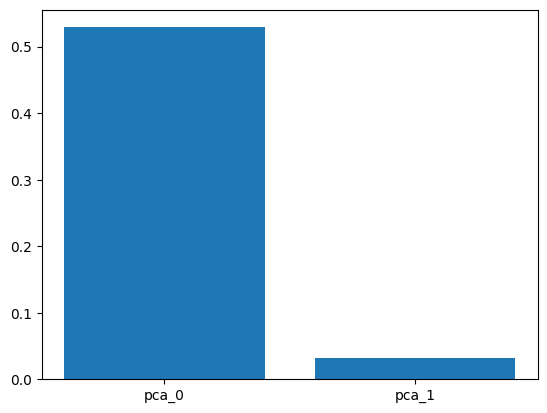

In [11]:
from matplotlib import pyplot as plt
plt.bar(pca_names, pca.explained_variance_ratio_)

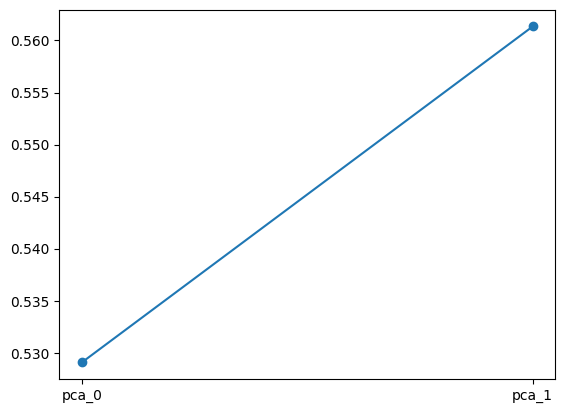

In [12]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pca_names, cumulative_variance_ratio, marker='o')

In [13]:
df_scaled = scaler.fit_transform(df_pca)
df_scaled = pd.DataFrame(df_scaled, columns=['pca_0', 'pca_1'])
dump(df_scaled, 'clustering_data.joblib')
df_scaled

,pca_0,pca_1
0,0.751095,0.480033
1,0.666295,0.486975
2,0.693642,0.494915
3,0.465188,0.431669
4,0.645849,0.529784
...,...,...
1495,0.313644,0.284375
1496,0.421056,0.555207
1497,0.736281,0.351247
1498,0.423604,0.304347
